a) load MNIST dataset

In [2]:
import tensorflow
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

b) Use holdout validation 60% train, 20% val, 20% test

In [3]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import numpy as np

(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = mnist.load_data()

x_total = np.concatenate((x_train_orig, x_test_orig), axis=0)
y_total = np.concatenate((y_train_orig, y_test_orig), axis=0)

x_train, x_temp, y_train, y_temp = train_test_split(
    x_total, y_total, test_size=0.4, random_state=42, stratify=y_total
)

x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

c) train a LeNet-5 CNN

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, AveragePooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

x_train = x_train.astype("float32") / 255.0
x_val = x_val.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = np.expand_dims(x_train, -1)
x_val = np.expand_dims(x_val, -1)
x_test = np.expand_dims(x_test, -1)

model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(filters=6, kernel_size=(5, 5), activation='tanh', padding='same'),
    AveragePooling2D(pool_size=(2, 2)),

    Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'),
    AveragePooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(units=120, activation='tanh'),
    Dense(units=84, activation='tanh'),
    Dense(units=10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=10,
          batch_size=64,
          validation_data=(x_val, y_val))

Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 36s 47ms/step - accuracy: 0.5732 - loss: 1.2285 - val_accuracy: 0.8970 - val_loss: 0.3361
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 0.9033 - loss: 0.3132 - val_accuracy: 0.9180 - val_loss: 0.2648
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.9266 - loss: 0.2399 - val_accuracy: 0.9346 - val_loss: 0.2139
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.9395 - loss: 0.1981 - val_accuracy: 0.9449 - val_loss: 0.1846
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 0.9490 - loss: 0.1679 - val_accuracy: 0.9514 - val_loss: 0.1592
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.9571 - loss: 0.1393 - val_accuracy: 0.9563 - val_loss: 0.1436
Epoch 7/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.9619 - loss: 0.1224 - val_accuracy: 0.9594 - val_loss: 0.1308
Epoch 8/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 0.9674 - loss: 0.1085 - 

d) show confusion matrix

438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step


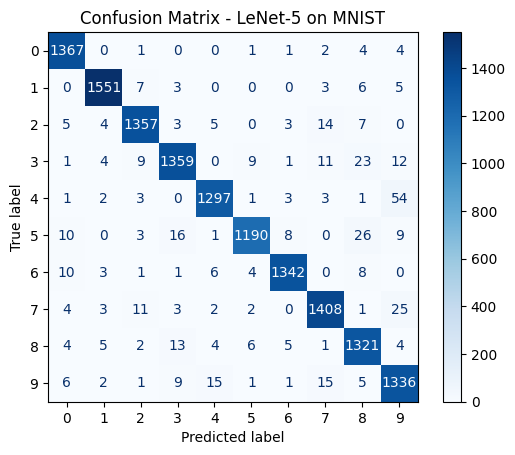

In [6]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - LeNet-5 on MNIST")
plt.show()